In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# read ./data/immo_data_202208.csv
df = pd.read_csv('../data/immo_data_202208_v2.csv')
df.head()


C:\Users\laeub\AppData\Local\Temp\ipykernel_11588\2127817799.py:2: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/immo_data_202208_v2.csv')


,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,0,0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,1,1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,2,2,NaN,NaN,NaN,NaN,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,3,3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,4,4,Küttigen,142 m²,NaN,NaN,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Municipality', 'Living space',
       'Plot area', 'Floor space', 'Availability', 'location', 'description',
       'detailed_description',
       ...
       'features', 'description_detailed', 'Floor space:', 'Number of floors:',
       'Volume:', 'plz', 'Number of toilets:', 'Gross yield:',
       'Minimum floor space:', 'space_cleaned'],
      dtype='object', length=134)

In [4]:
# show amount of rows where living space does contain m²
print(df[df['Living space'].str.contains('m²') == True].shape[0])
# show amount of rows where living space is Nan
print(df[df['Living space'].isna() == True].shape[0])

print(df[df['Living space'].isna() == True].shape[0] + df[df['Living space'].str.contains('m²') == True].shape[0])
# show amount of rows in df0
print(df.shape[0])

11613
10868
22481
22481


In [5]:
# remove ' m²' from 'Living space', 'Plot area', 'Floor space' in df
df['Living space'] = df['Living space'].str.replace(' m²', '')
df['Plot area'] = df['Plot area'].str.replace(' m²', '')
df['Floor space'] = df['Floor space'].str.replace(' m²', '')
# replace commas with '' in those columns
df['Living space'] = df['Living space'].str.replace(',', '')
df['Plot area'] = df['Plot area'].str.replace(',', '')
df['Floor space'] = df['Floor space'].str.replace(',', '')

# try converting those columns to float
df['Living space'] = df['Living space'].astype(float)   
df['Plot area'] = df['Plot area'].astype(float)
df['Floor space'] = df['Floor space'].astype(float)


In [6]:
df

,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,0,0,Biberstein,100.0,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,1,1,Biberstein,156.0,222.0,242.0,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,2,2,NaN,NaN,NaN,NaN,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,3,3,Biberstein,154.0,370.0,257.0,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,4,4,Küttigen,142.0,NaN,NaN,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,22476,29298,Buchs SG,NaN,NaN,NaN,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,22477,29300,Wil,NaN,NaN,NaN,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,22478,29301,Wil SG,NaN,NaN,NaN,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,22479,29302,Matzingen,NaN,NaN,NaN,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


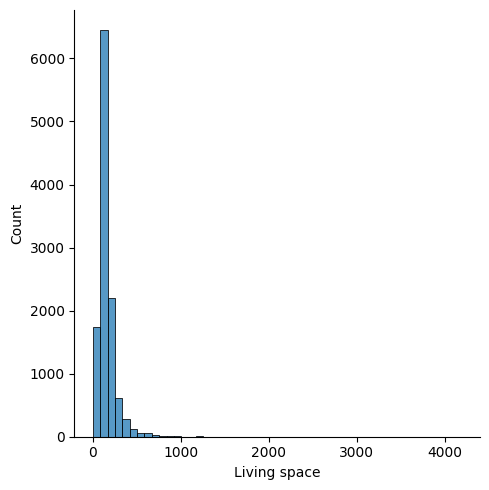

In [7]:
# plot the distribution of 'Living space' in df
sns.displot(df['Living space'], bins=50)

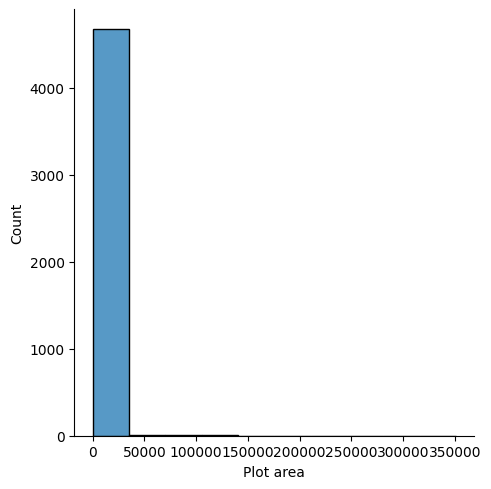

In [10]:
# plot the distribution of 'Plot area' in df
sns.displot(df['Plot area'], bins=10)

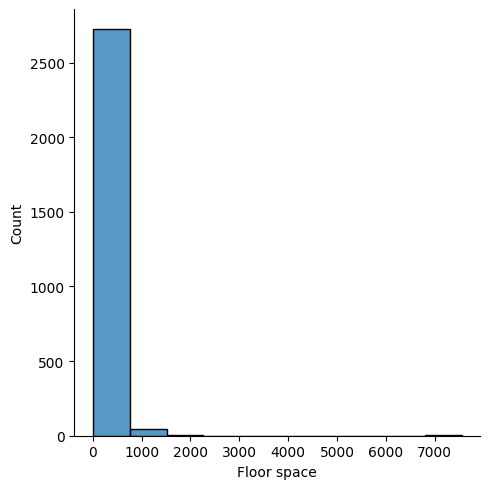

In [11]:
# plot the distribution of 'Floor space' in df
sns.displot(df['Floor space'], bins=10)